In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, sample, audio, utils, viz

In [3]:
p, n_examples, n_samples = model.HParams(n_audio_chans=1, dilation_stacks=2), 2**14, 4
X = audio.load_dataset_from_track('data/steinway.wav', audio.HParams())[:n_examples]
split = int(X.shape[0] * 0.8)
X_train = X[:split]
X_test = X[split:]

In [4]:
m = model.Wavenet(p)
t = train.Trainer(m, X_train, X_test, train.HParams(max_epochs=10, batch_size=8, num_workers=8, ckpt_path='checkpoints'), None)

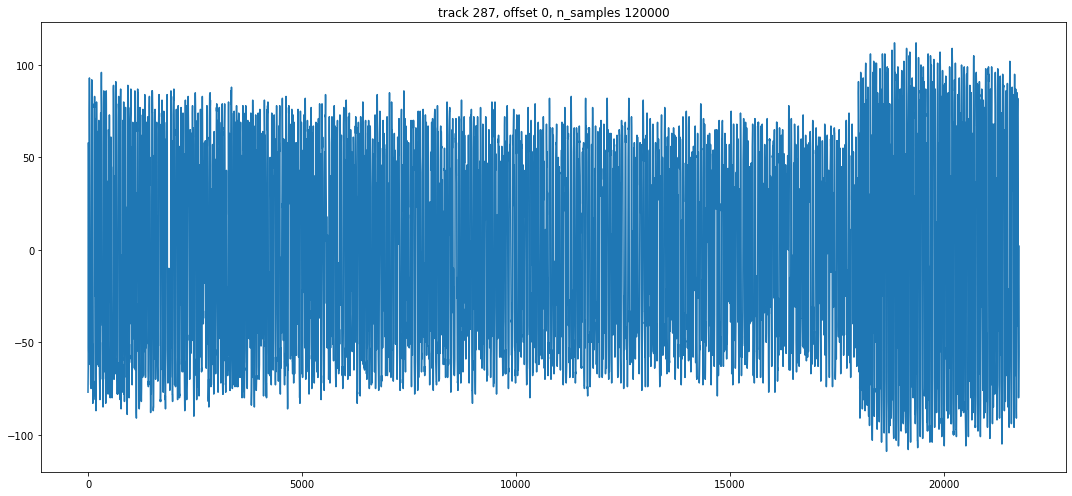

In [5]:
track_i = viz.plot_track(X, n_samples=120_000)

In [6]:
ipd.Audio(X[track_i].squeeze(), rate=p.sampling_rate)

In [7]:
t.train()

  0%|          | 0/438 [00:00<?, ?it/s]/home/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:61: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
7:242 loss 5.18469 lr 3.000000e-04:  55%|█████▌    | 243/438 [04:28<03:35,  1.11s/it]


KeyboardInterrupt: 

In [12]:
_, track = sample.sample(m, 80_000)

0

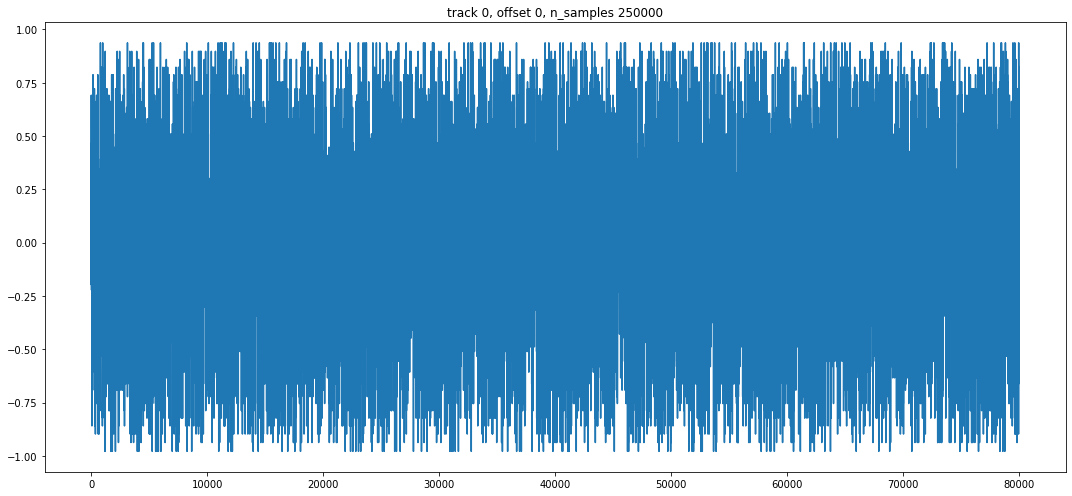

In [13]:
viz.plot_track(track, n_samples=250000)

In [14]:
ipd.Audio(track[0].squeeze(), rate=p.sampling_rate)